<div style="font-family:Trebuchet MS; background-color:#dbe3ed; border-left:5px solid #000000; padding:12px; text-align:center;">
    <h2 style="color:#004080; font-size:48px;"><b>Melbourne Housing Market</b></h2>
    <hr style="border-top:2px solid #004080;">
    <h3 style="font-size:14px; color:#004080; text-align:left;"><strong>David Fernández Reboredo</strong></h3>
    <img src="https://th.bing.com/th/id/OIG1.tB1IaR9ONaRtPNYtOrYt?w=1024&h=1024&rs=1&pid=ImgDetMain" alt="Melbourne Housing Market" style="max-width:50%; display:block; margin:auto;">
</div>



<div style="font-family:Trebuchet MS; background-color: #dbe3ed; padding: 10px; border-radius: 5px;">
    <h2 style='color:#004080;'>Índice</h2>
    <hr style="border-top:2px solid #004080;">
</div>


1. [FITS](#FITS)
2. [DEFINICION_METODOS_BOXPLOT_Y_MAPA_DE_CALOR](#DEFINICION_METODOS_BOXPLOT_Y_MAPA_DE_CALOR)
3. [DEFINICION_METODOS_BOXPLOT_Y_MAPA_DE_CALOR](#DEFINICION_METODOS_BOXPLOT_Y_MAPA_DE_CALOR)
    1. [Primera sección](#primera-sección)
    2. [Segunda sección](#segunda-sección)
3. [Conclusiones](#conclusiones)

## FITS

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split

def train(wine_pd):
    wine = wine_pd.copy()

    y = wine["Price"].copy()
    x = wine[["Rooms", "Bathroom","Bedroom2",'YearBuilt']]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

    print(f'({len(x_train)+len(y_train)},{(len(x_test)+len(y_test))})')

    return x_train, y_train,x_test,y_test


def regresion_lineal(wine_pd):
    print('------------Regresion Lineal-------------')
    x_train,y_train,x_test,y_test=train(wine_pd)

    scaler = StandardScaler()

    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    lin_reg= LinearRegression()

    lin_reg.fit(x_train,y_train)

    predicciones = lin_reg.predict(x_train)

    mse = mean_squared_error(y_train, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_train, predicciones)

    score = r2_score(y_train, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def arbol_de_regresion_test(wine_pd):
    print('----------Arbol de regresión-----------')
    x_train,y_train,x_test,y_test=train(wine_pd)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)

    predicciones = tree_reg.predict(x_train)

    mse = mean_squared_error(y_train, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_train, predicciones)
    score = r2_score(y_train, predicciones)
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def arbol_decision(wine_pd):
    # cross-validation arbol decision
    print('---------------Arbol de decision---------------')
    x_train,y_train,x_test,y_test=train(wine_pd)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(x_train, y_train)
    lin_score = cross_val_score(tree_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-lin_score)
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    predicciones = tree_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def random_forest(wine_pd):
    print('---------------Random forest---------------')
    x_train,y_train,x_test,y_test=train(wine_pd)

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    rf_reg = RandomForestRegressor(n_estimators=100)
    rf_reg.fit(x_train, y_train)

    rf_score = cross_val_score(rf_reg, x_test, y_test,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    predicciones = rf_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)

    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def regresion_svr(wine_pd):
    print('---------------Regresion svr---------------')
    x_train,y_train,x_test,y_test=train(wine_pd)
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    sv_reg = SVR()

    sv_reg.fit(x_train, y_train)
    predicciones = sv_reg.predict(x_test)

    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)
    rf_score = cross_val_score(sv_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("SV cross")
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

def xgboost(wine_pd):
    print('---------------Xboost---------------')
    x_train,y_train,x_test,y_test=train(wine_pd)
    # scaler = StandardScaler()
    # x_train = scaler.fit_transform(x_train)
    # x_test = scaler.transform(x_test)
    xgb_reg = xgb.XGBRegressor()
    xgb_reg.fit(x_train, y_train)
    predicciones = xgb_reg.predict(x_test)
    mse = mean_squared_error(y_test, predicciones)
    mse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predicciones)
    score = r2_score(y_test, predicciones)
    rf_score = cross_val_score(xgb_reg, x_train, y_train,
                                scoring = "neg_mean_squared_error", cv=10)
    root_lin_score = np.sqrt(-rf_score)
    print("XGB cross")
    print("Scores: ", root_lin_score)
    print("Media: ", root_lin_score.mean())
    print("Desviación Std", root_lin_score.std())
    print(f"mae: {mae}   rmse: {mse} r2_score: {score}")

# DEFINICION_METODOS_BOXPLOT_Y_MAPA_DE_CALOR

In [53]:
import matplotlib.pyplot as plt
def boxplot_general(wine_pd,cadena):
    for tipo in wine_pd.columns:
        if tipo !=cadena:
            data_to_plot = [wine_pd[wine_pd[cadena] == i][tipo].values for i in sorted(wine_pd[cadena].unique())]
            plt.figure(figsize=(10, 6))
            plt.boxplot(data_to_plot, labels=sorted(wine_pd[cadena].unique()),notch=True,patch_artist=True,
                        showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                        medianprops=dict(color='deeppink'),
                        flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                        boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                        capprops=dict(color='deeppink', linewidth=2)
                        )
            plt.xlabel(cadena)
            plt.ylabel(f'{tipo}')
            plt.title(f'Boxplot Quality/ {tipo}')
            plt.show()
def boxplot(wine_pd,y,x):
        data_to_plot = [wine_pd[wine_pd[x] == i][y].values for i in sorted(wine_pd[x].unique())]
        plt.figure(figsize=(10, 6))
        plt.boxplot(data_to_plot, labels=sorted(wine_pd[x].unique()),notch=True,patch_artist=True,
                    showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                    medianprops=dict(color='deeppink'),
                    flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                    boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                    capprops=dict(color='deeppink', linewidth=2)
                    )
        plt.xlabel(x)
        plt.ylabel(f'{y}')
        plt.title(f'Boxplot Quality/ {y}')
        plt.show()
def mapa_calor(corr_matrix):
  fig, ax = plt.subplots(figsize=(15, 8))
  text_colors = ("black" , "white" )
  im = ax.imshow(corr_matrix, cmap= "Greens" ) # mapa de calor
  cbar = fig.colorbar(im, ax=ax, label= "Correlacion" ) # leyenda
  cbar.outline.set_visible(False)

  x = corr_matrix.columns
  y = corr_matrix.index
  # Mostrar las etiquetas. El color del texto cambia en función de su normalización
  for i in range(len(y)):
    for j in range(len(x)):
      value = corr_matrix.iloc[i, j]
      text_color = text_colors[int(im.norm(value) > 0.5)] # color etiqueta
      ax.text(j, i, f"{value:.2f}" , color=text_color, va= "center" , ha= "center" )



  # Formateo de los ejes
  ax.set_xticks(range(len(x)))
  ax.set_xticklabels(x, rotation=90)
  ax.set_yticks(range(len(y)))
  ax.set_yticklabels(y)
  ax.invert_yaxis()
  ax.spines["right"].set_visible(False) # ocultar borde derecho
  ax.spines["top"].set_visible(False) # ocultar borde superior
  fig.tight_layout()

# IMPORTACION_DE_CSV

In [54]:
import pandas as pd 
import numpy as np 
mel_full = pd.read_csv('Melbourne_housing_FULL.csv')

In [55]:
mel_full

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [56]:
mel_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [57]:
columnas = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for col in columnas:
    mel_full[col] = mel_full[col].astype('string') 

mel_full['Date']=pd.to_datetime(mel_full['Date'], format="%d/%m/%Y")
mel_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  string        
 1   Address        34857 non-null  string        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  string        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  string        
 6   SellerG        34857 non-null  string        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [58]:
len(mel_full)

34857

In [59]:
mel_full.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34857,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,2017-05-23 11:01:38.838109696,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
min,1.000000,8.500000e+04,2016-01-28 00:00:00,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,2016-11-19 00:00:00,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,2017-07-08 00:00:00,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,2017-10-28 00:00:00,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,2018-03-17 00:00:00,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000
std,0.969933,6.414671e+05,NaN,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>],
       [<Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >]],
      dtype=object)

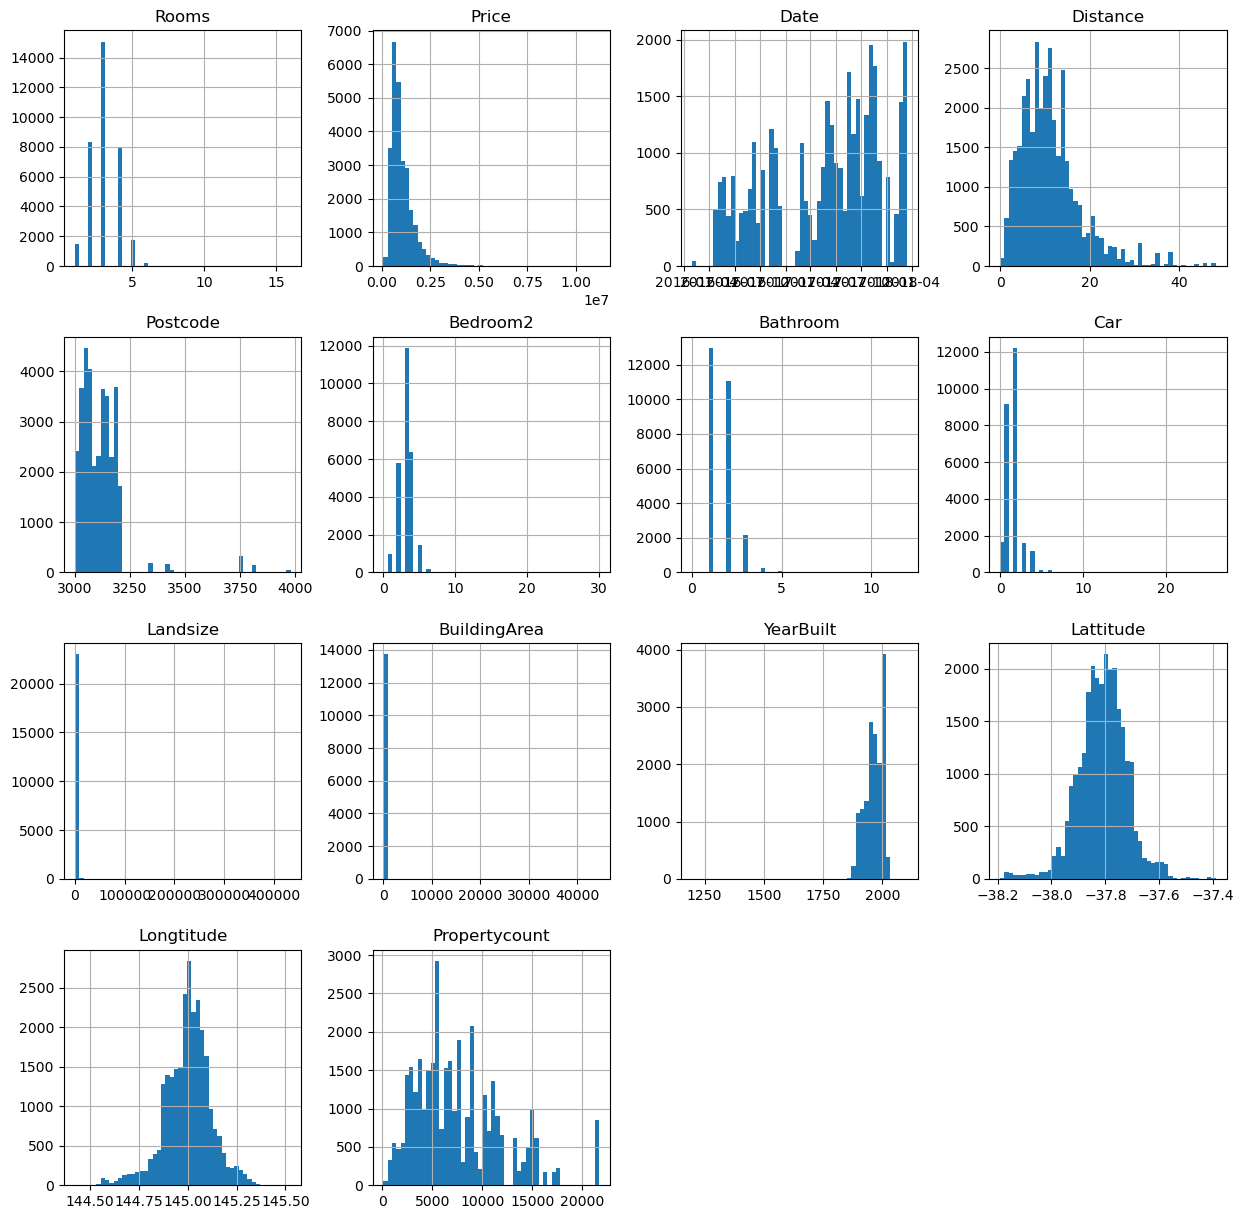

In [60]:
mel_full.hist(bins=50, figsize=(15,15))

In [61]:
mel_full.isna().sum()
#valores na en las distintas columnas

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [62]:

mel_full.drop_duplicates(inplace=True)
mel_sin_string=mel_full.copy()
mel_sin_string=mel_sin_string.drop(['Suburb','Address','SellerG','CouncilArea','Regionname'],axis=1)

mel_sin_string.info()





<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 34856
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Rooms          34856 non-null  int64         
 1   Type           34856 non-null  string        
 2   Price          27247 non-null  float64       
 3   Method         34856 non-null  string        
 4   Date           34856 non-null  datetime64[ns]
 5   Distance       34855 non-null  float64       
 6   Postcode       34855 non-null  float64       
 7   Bedroom2       26639 non-null  float64       
 8   Bathroom       26630 non-null  float64       
 9   Car            26128 non-null  float64       
 10  Landsize       23046 non-null  float64       
 11  BuildingArea   13741 non-null  float64       
 12  YearBuilt      15550 non-null  float64       
 13  Lattitude      26880 non-null  float64       
 14  Longtitude     26880 non-null  float64       
 15  Propertycount  34853 non

In [63]:
mel_sin_string[['Method']].value_counts()

Method
S         19744
SP         5094
PI         4850
VB         3108
SN         1317
PN          308
SA          226
W           173
SS           36
Name: count, dtype: int64

In [64]:
mel_sin_string[['Type']].value_counts()

Type
h       23980
u        7297
t        3579
Name: count, dtype: int64

In [65]:
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()
housing_cat_encoded = oe.fit_transform(mel_sin_string[['Method']])
mel_sin_string['Method_Int'] = housing_cat_encoded
mel_sin_string[['Method_Int']].value_counts()


Method_Int
2.0           19744
5.0            5094
0.0            4850
7.0            3108
4.0            1317
1.0             308
3.0             226
8.0             173
6.0              36
Name: count, dtype: int64

In [66]:
mel_sin_string=mel_sin_string[mel_sin_string['Type']=='h']
dfmelboune=mel_sin_string.drop(['Type','Method'],axis=1)
dfmelboune

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Method_Int
0,2,NaN,2016-09-03,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.80140,144.99580,4019.0,6.0
1,2,1480000.0,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0,2.0
2,2,1035000.0,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0,2.0
4,3,1465000.0,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0,5.0
5,3,850000.0,2017-03-04,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,3,1101000.0,2018-02-24,6.3,3013.0,3.0,1.0,NaN,288.0,NaN,NaN,-37.81095,144.88516,6543.0,2.0
34852,4,1480000.0,2018-02-24,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,-37.81053,144.88467,6543.0,0.0
34853,2,888000.0,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,-37.81551,144.88826,6543.0,5.0
34855,3,1140000.0,2018-02-24,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6543.0,5.0


In [67]:
corr_matrix= dfmelboune.corr()
corr_matrix

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Method_Int
Rooms,1.000000,0.318045,0.072691,0.153622,0.087980,0.922920,0.608162,0.302227,0.034242,0.128913,0.187893,-0.038916,0.114497,-0.016720,0.010991
Price,0.318045,1.000000,-0.079137,-0.381498,0.012566,0.298083,0.383945,0.099694,0.025981,0.075080,-0.293182,-0.265892,0.214247,-0.039029,0.024109
Date,0.072691,-0.079137,1.000000,0.294207,0.133470,0.125187,0.063975,0.122260,0.023495,0.008947,0.206005,0.012316,0.051383,0.039238,0.036485
Distance,0.153622,-0.381498,0.294207,1.000000,0.514903,0.170186,0.082597,0.193485,0.068879,0.058115,0.480643,-0.099426,0.178340,0.040408,-0.018816
Postcode,0.087980,0.012566,0.133470,0.514903,1.000000,0.094036,0.127039,0.059431,0.043416,0.038030,0.141168,-0.187658,0.344997,0.022386,0.000729
Bedroom2,0.922920,0.298083,0.125187,0.170186,0.094036,1.000000,0.609537,0.296184,0.033627,0.126028,0.192316,-0.038036,0.116559,-0.011998,0.009498
Bathroom,0.608162,0.383945,0.063975,0.082597,0.127039,0.609537,1.000000,0.253745,0.032408,0.126933,0.246768,-0.071983,0.113262,-0.012341,0.016608
Car,0.302227,0.099694,0.122260,0.193485,0.059431,0.296184,0.253745,1.000000,0.032769,0.083840,0.232787,-0.020660,0.038273,0.016498,0.000772
Landsize,0.034242,0.025981,0.023495,0.068879,0.043416,0.033627,0.032408,0.032769,1.000000,0.447785,0.082807,0.025445,-0.000713,-0.021777,0.010204
BuildingArea,0.128913,0.075080,0.008947,0.058115,0.038030,0.126028,0.126933,0.083840,0.447785,1.000000,0.192845,0.016726,-0.005809,-0.016698,-0.000949


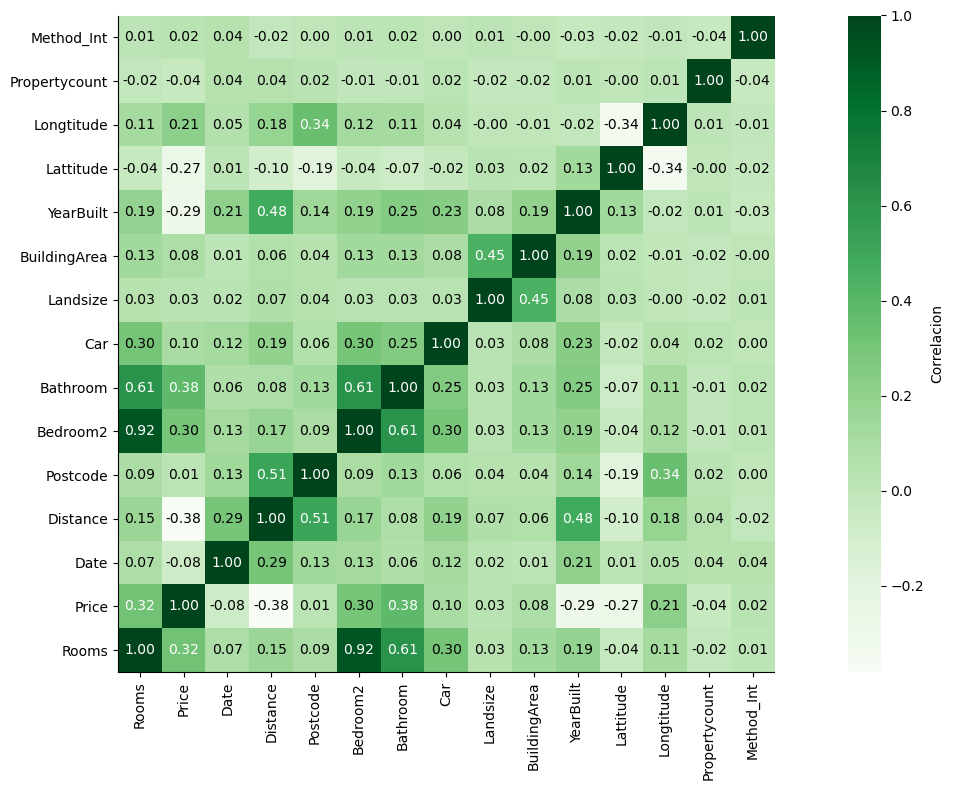

In [68]:
mapa_calor(corr_matrix)

In [74]:
# train(corr_matrix)
# regresion_lineal(dfmelboune)
dfmelburne_sinpricesnulos = dfmelboune.dropna(subset=['Price'])

In [71]:


from sklearn.impute import SimpleImputer

imp_mean_Bathroom = SimpleImputer()
df2 = dfmelboune.copy()

imp_mean_Bathroom.fit(df2[["Bathroom"]])


df2["Bathroom"] = imp_mean_Bathroom.transform(df2[["Bathroom"]])

Bathroom
1.000000     12969
2.000000     11064
1.624747      8226
3.000000      2180
4.000000       269
5.000000        77
0.000000        46
6.000000        16
7.000000         4
8.000000         3
12.000000        1
9.000000         1
Name: count, dtype: int64

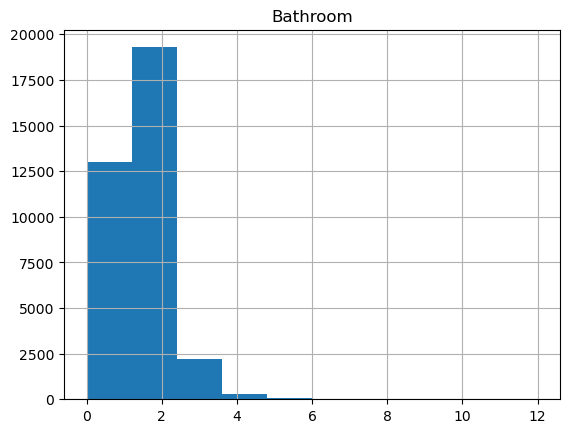

In [72]:
df2.hist("Bathroom")
df2["Bathroom"].value_counts()

In [ ]:
# Method:
# S - property sold;
# SP - property sold prior;
# PI - property passed in;
# PN - sold prior not disclosed;
# SN - sold not disclosed;
# NB - no bid;
# VB - vendor bid;
# W - withdrawn prior to auction;
# SA - sold after auction;
# SS - sold after auction price not disclosed.
# N/A - price or highest bid not available.

# Type:
# br - bedroom(s);
# h - house,cottage,villa, semi,terrace;
# u - unit, duplex;
# t - townhouse;
# dev site - development site;
# o res - other residential.

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,8/10/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,3067.0,...,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34838,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,24/02/2018,6.8,3016.0,...,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34839,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,24/02/2018,6.8,3016.0,...,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34840,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,24/02/2018,6.8,3016.0,...,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34844,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,24/02/2018,4.6,3181.0,...,NaN,NaN,NaN,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0
